## Setting Up the Ratings Data

In [19]:
import pandas as pd
import numpy as np

In [20]:
with open('data/movies.txt', 'r') as f:
    movies = f.read().split('\r')
with open ('data/data.txt', 'r') as f:
    ratings = f.read().split('\r')

In [21]:
movies_list = []
for m in movies:
    movies_list.append(m.split('\t'))

ratings_list = []
for r in ratings:
    ratings_list.append(r.split('\t'))


In [22]:
movies_df = pd.DataFrame(movies_list, columns = ['Movie Id', 'Movie Title', 'Unknown', 'Action', \
                                                 'Adventure', 'Animation', 'Childrens', \
                                                 'Comedy', 'Crime', 'Documentary', 'Drama', \
                                                 'Fantasy', 'Film-Noir', 'Horror', \
                                                 'Musical', 'Mystery', 'Romance', \
                                                 'Sci-Fi', 'Thriller', 'War', \
                                                 'Western'])

ratings_df =  pd.DataFrame(ratings_list, columns = ['User Id', 'Movie Id', 'Rating'])

In [23]:
movies_df =  movies_df.apply(pd.to_numeric, errors='ignore')
ratings_df = ratings_df.apply(pd.to_numeric)

In [24]:
movies_df.head()

,Movie Id,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
ratings_df.head()

,User Id,Movie Id,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [26]:
r_df = ratings_df.pivot(index = 'Movie Id', columns ='User Id', values = 'Rating').fillna(0)

In [27]:
r_df.head()

User Id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
Movie Id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
ratings_matrix = r_df.as_matrix().T # Transpose because we want users as rows

In [29]:
ratings_matrix

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

In [30]:
np.savetxt('data/ratings.out', ratings_matrix, delimiter=',')

In [31]:
ratings_matrix = np.loadtxt('data/ratings.out',delimiter=',')

In [32]:
ratings_matrix

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

In [33]:
r_df['Total Ratings'] = (r_df != 0).sum(axis=1)

In [34]:
r_df.head()

User Id,1,2,3,4,5,6,7,8,9,10,...,935,936,937,938,939,940,941,942,943,Total Ratings
Movie Id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,452
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,131
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,209
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86


In [44]:
r_df['Average Rating'] = r_df[range(1, 944)].replace(0, np.nan).mean(axis=1) # Ignore 0 and Total Ratings Column

In [45]:
r_df.head()

User Id,1,2,3,4,5,6,7,8,9,10,...,936,937,938,939,940,941,942,943,Total Ratings,Average Rating
Movie Id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,452,3.878319
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,131,3.206107
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90,3.033333
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,209,3.550239
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86,3.302326


## Basic Visualization

In [88]:
import seaborn
import matplotlib.pyplot as plt
% matplotlib inline

In [168]:
counts = np.bincount(ratings_df['Rating'].values)

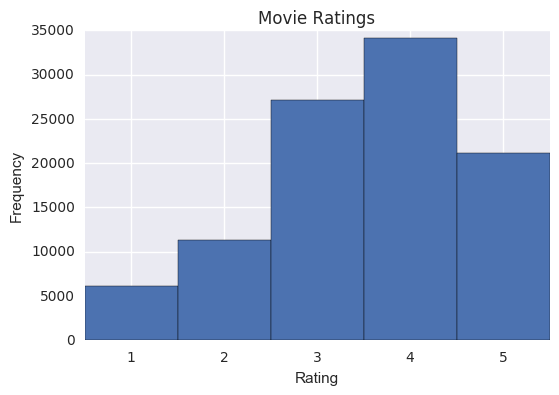

In [169]:
width = 1

plt.bar(np.arange(5), counts[1:], width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_all.png')
plt.show()

### Visualize for Ten Most Popular Movies

In [57]:
r_df.sort_values('Total Ratings', ascending=False)[:10]

User Id,1,2,3,4,5,6,7,8,9,10,...,936,937,938,939,940,941,942,943,Total Ratings,Average Rating
Movie Id,,,,,,,,,,,,,,,,,,,,,
50,5.0,5.0,0.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,...,4.0,5.0,5.0,0.0,4.0,0.0,5.0,4.0,583,4.358491
258,5.0,3.0,2.0,5.0,0.0,2.0,4.0,5.0,0.0,0.0,...,3.0,4.0,5.0,4.0,5.0,4.0,4.0,0.0,509,3.803536
100,5.0,5.0,0.0,0.0,5.0,5.0,5.0,0.0,0.0,5.0,...,4.0,3.0,5.0,0.0,3.0,0.0,0.0,5.0,508,4.155512
181,5.0,0.0,4.0,0.0,5.0,0.0,3.0,4.0,0.0,0.0,...,4.0,0.0,5.0,0.0,3.0,5.0,0.0,4.0,507,4.007890
294,0.0,1.0,2.0,5.0,0.0,2.0,1.0,3.0,4.0,3.0,...,3.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,485,3.156701
286,0.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,5.0,4.0,...,5.0,4.0,3.0,0.0,3.0,0.0,0.0,0.0,481,3.656965
288,0.0,3.0,2.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,478,3.441423
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,452,3.878319
300,0.0,4.0,2.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,...,3.0,4.0,3.0,0.0,5.0,4.0,5.0,0.0,431,3.631090


In [58]:
ten_most_popular = r_df.sort_values('Total Ratings', ascending=False)[:10].index

In [59]:
ten_most_popular

Int64Index([50, 258, 100, 181, 294, 286, 288, 1, 300, 121], dtype='int64', name=u'Movie Id')

In [60]:
most_popular_df = ratings_df[ratings_df['Movie Id'].isin(ten_most_popular)]

In [61]:
most_popular_df.head()

,User Id,Movie Id,Rating
24,308,1,4
50,251,100,4
53,25,181,5
61,20,288,1
100,32,294,3


In [165]:
counts = np.bincount(most_popular_df['Rating'].values)

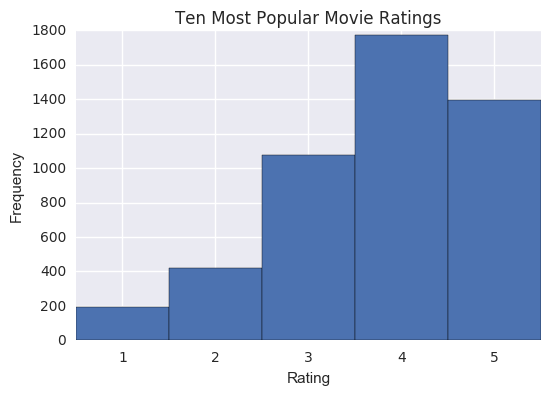

In [167]:
width = 1

plt.bar(np.arange(5), counts[1:], width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Ten Most Popular Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_popular.png')
plt.show()

### Visualize for Ten Best Movies

Found 10 most highly rated movies, but only among movies that had $\geq$ 5 ratings. Otherwise, many movies with only 1 or 2 ratings that were 5 would be selected.

In [64]:
r_filtered_df = r_df[r_df['Total Ratings'] >= 5]

In [65]:
r_filtered_df.sort_values(['Average Rating'], ascending=False)[:10]

User Id,1,2,3,4,5,6,7,8,9,10,...,936,937,938,939,940,941,942,943,Total Ratings,Average Rating
Movie Id,,,,,,,,,,,,,,,,,,,,,
1449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,4.625000
408,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,112,4.491071
318,0.0,0.0,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,298,4.466443
169,5.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118,4.466102
483,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243,4.456790
114,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67,4.447761
64,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,283,4.445230
603,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,209,4.387560
12,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,267,4.385768


In [66]:
ten_best = r_filtered_df.sort_values(['Average Rating'], ascending=False)[:10].index

In [67]:
ten_best

Int64Index([1449, 408, 318, 169, 483, 114, 64, 603, 12, 50], dtype='int64', name=u'Movie Id')

In [68]:
best_df = ratings_df[ratings_df['Movie Id'].isin(ten_best)]

In [170]:
counts = np.bincount(best_df['Rating'].values)

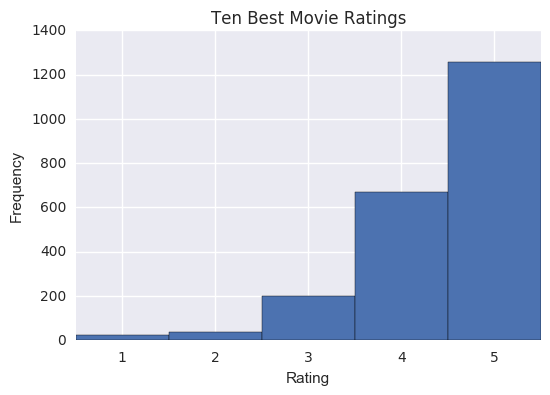

In [171]:
width = 1

plt.bar(np.arange(5), counts[1:], width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Ten Best Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_best.png')
plt.show()

### Visualize for 3 Random Genres

In [71]:
genres = ['Drama', 'Comedy', 'Thriller'] #top 3 most popular genres

In [72]:
drama_movies = movies_df[movies_df['Drama'] == 1]['Movie Id']

In [73]:
len(drama_movies)

725

In [74]:
drama_df = ratings_df[ratings_df['Movie Id'].isin(drama_movies)]

In [172]:
counts = np.bincount(drama_df['Rating'].values)

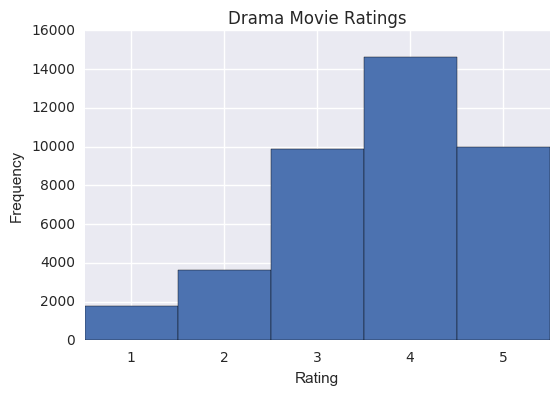

In [173]:
width = 1

plt.bar(np.arange(5), counts[1:], width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Drama Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_drama.png')
plt.show()

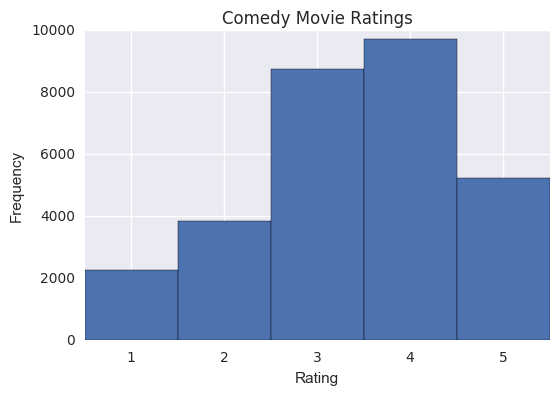

In [174]:
comedy_movies = movies_df[movies_df['Comedy'] == 1]['Movie Id']
comedy_df = ratings_df[ratings_df['Movie Id'].isin(comedy_movies)]

counts = np.bincount(comedy_df['Rating'].values)

width = 1

plt.bar(np.arange(5), counts[1:], width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Comedy Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_comedy.png')
plt.show()

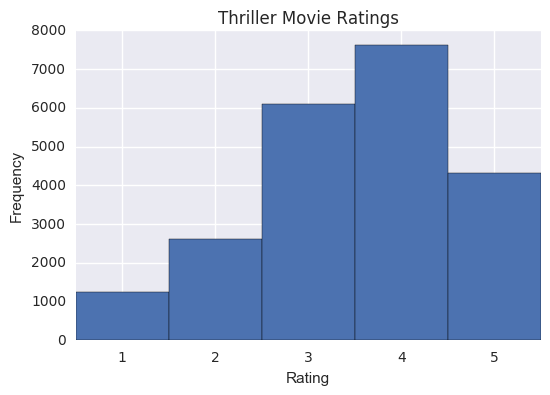

In [175]:
thriller_movies = movies_df[movies_df['Thriller'] == 1]['Movie Id']
thriller_df = ratings_df[ratings_df['Movie Id'].isin(thriller_movies)]

counts = np.bincount(thriller_df['Rating'].values)

width = 1

plt.bar(np.arange(5), counts[1:], width)
plt.xticks(np.arange(5) + width/2., range(1, 6)) 
plt.title("Thriller Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig('basic_thriller.png')
plt.show()

### Visualize Average Ratings Statistics

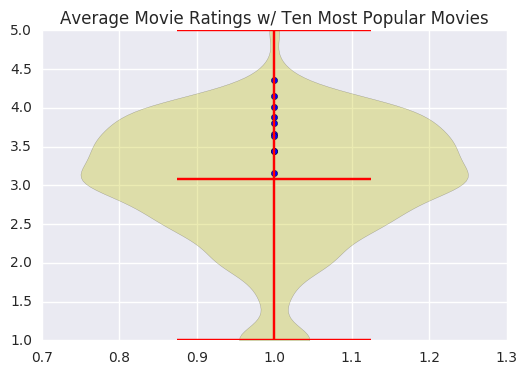

In [183]:
plt.violinplot(r_df['Average Rating'].tolist(), showmeans=True,\
                   showmedians=False)
plt.ylim(1, 5)

data_x = [1.0] * 10
data_y = r_df.ix[ten_most_popular.tolist()]['Average Rating'].tolist()
plt.scatter(data_x, data_y, marker='o')

plt.title('Average Movie Ratings w/ Ten Most Popular Movies')
plt.savefig('violin_popular.png')
plt.show()

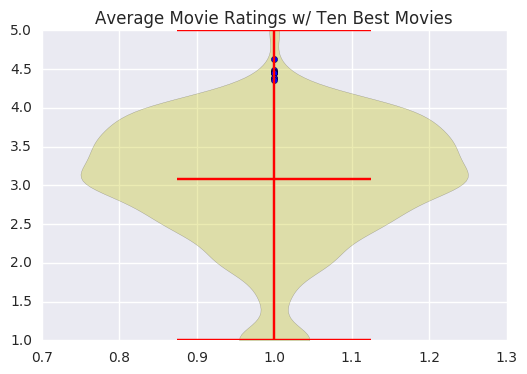

In [184]:
plt.violinplot(r_df['Average Rating'].tolist(), showmeans=True,\
                   showmedians=False)
plt.ylim(1, 5)

data_x = [1.0] * 10
data_y = r_df.ix[ten_best.tolist()]['Average Rating'].tolist()
plt.scatter(data_x, data_y, marker ='o')

plt.title('Average Movie Ratings w/ Ten Best Movies')
plt.savefig('violin_best.png')
plt.show()